In [1]:
import numpy as np
import os
import pandas as pd

import gzip
import json

# from sklearn.cluster import KMeans
import random

In [2]:
## load 8 feature datasets
dielect = pd.read_csv("./datasets8_magpie/dielectric_feature.csv")
bg = pd.read_csv("./datasets8_magpie/bg_features.csv")
kvrh = pd.read_csv("./datasets8_magpie/kvrh_features.csv")
gvrh = pd.read_csv("./datasets8_magpie/gvrh_features.csv")
perov = pd.read_csv("./datasets8_magpie/perov_features.csv")
metal = pd.read_csv("./datasets8_magpie/metal_features.csv")

mat_dielect = pd.read_csv("./datasets8_magpie/mat_dielectric_feature.csv")
mat_elast = pd.read_csv("./datasets8_magpie/mat_elast_feature.csv")

In [3]:
dielect

,composition,target,1,2,3,4,5,6,7,8,...,12,13,14,15,16,17,18,19,20,21
0,KS,1.752064,45.500000,35.581650,362.445000,8.500000,3.500000,154.000000,1.700000,1.500000,...,3.500000,0.500000,1.000000,0.000000,0.0,1.500000,49.446771,1.101000,0.000000,149.500000
1,K3VO4,1.652859,61.125000,31.990050,888.091250,10.000000,3.000000,115.750000,2.433750,1.875000,...,5.000000,0.125000,1.000000,2.625000,0.0,3.750000,18.569583,0.000000,0.000000,120.500000
2,Rb2ZrO3,1.867858,52.166667,51.692967,486.220000,9.000000,3.500000,135.500000,2.215000,1.666667,...,4.000000,0.333333,1.000000,1.333333,0.0,2.666667,38.659167,0.000000,0.000000,114.666667
3,MnOF,2.676887,77.333333,29.978616,542.433333,13.333333,2.666667,87.333333,2.990000,2.000000,...,6.666667,0.000000,1.000000,1.666667,0.0,2.666667,9.766695,0.656667,0.000103,81.333333
4,Li2CoSiO4,1.793232,60.750000,20.612287,572.697500,11.125000,2.375000,94.625000,2.437500,1.750000,...,4.875000,0.250000,1.500000,0.375000,0.0,2.125000,12.536458,0.096625,0.193559,115.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,Cr2O5,2.458294,76.142857,26.284171,662.000000,13.142857,2.571429,86.857143,2.931429,1.714286,...,6.000000,0.285714,1.428571,1.428571,0.0,3.142857,9.700714,0.000000,0.000000,74.000000
3988,Ca2FeWO6,2.136837,69.000000,43.160440,876.080000,12.000000,3.000000,99.800000,2.766000,2.000000,...,7.400000,0.000000,1.200000,1.400000,0.0,2.600000,12.991000,0.000000,0.422133,98.400000
3989,La4MnS6O,2.690619,78.250000,34.841660,382.853333,14.166667,2.833333,96.833333,2.800833,2.000000,...,5.833333,0.000000,1.666667,1.166667,0.0,2.833333,17.096882,0.734000,0.000026,63.583333
3990,BaAg2GeSe4,2.811494,64.500000,99.129975,1107.065000,11.250000,4.750000,144.375000,1.897500,1.500000,...,11.250000,0.500000,1.250000,0.000000,0.0,1.750000,25.105000,0.195625,0.000000,199.125000


In [4]:
from pymatgen.core.composition import Composition

In [5]:
comp = Composition("LiFePO4")
aa = comp.as_dict()

In [6]:
aa.keys()

dict_keys(['Li', 'Fe', 'P', 'O'])

In [7]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [8]:
def ElementDistribution(df):
    element_dict = {}
    
    for i in range(len(df)):
        comp = Composition(df["composition"][i]).as_dict()
        
        for ele in comp:
            if ele in element_dict:
                element_dict[ele] += 1
            else:
                element_dict[ele] = 1
    
    print("Ca: ", element_dict["Ca"])
    
    ## plot ditribution
    plt.figure(figsize=(20,6))

    plt.bar(element_dict.keys(), element_dict.values(),width=1)
    
    plt.xticks(rotation = 60)
    plt.show()

Ca:  237


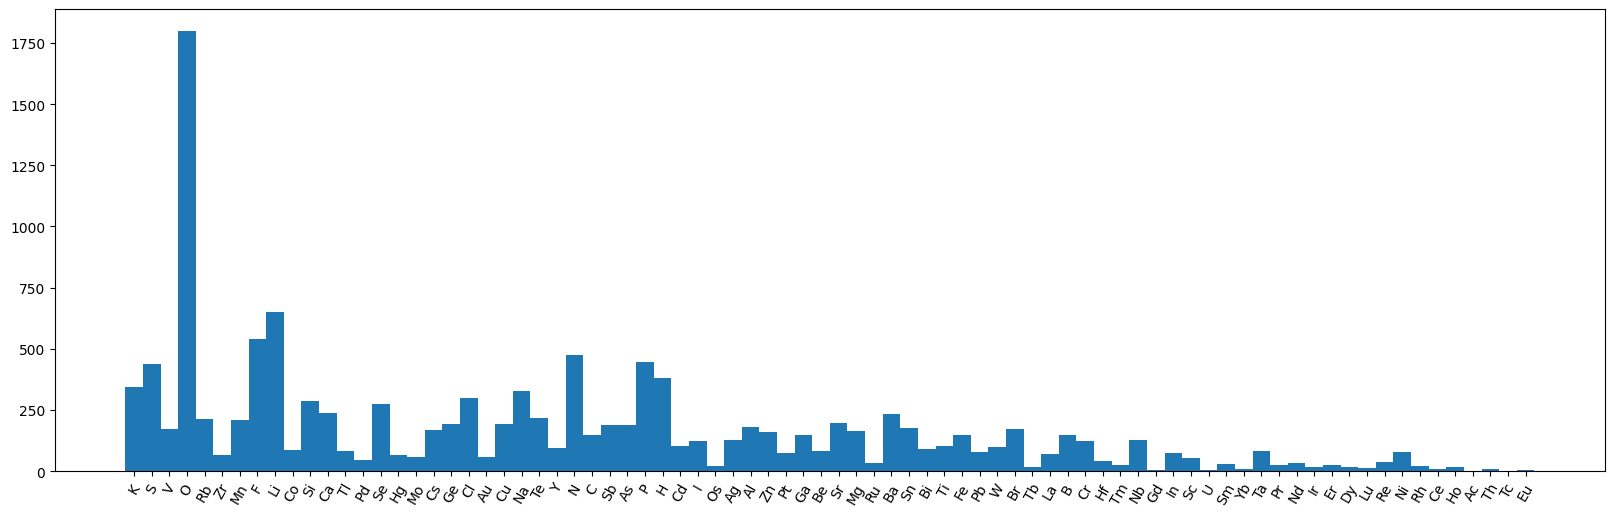

In [9]:
ElementDistribution(dielect)

Ca:  3955


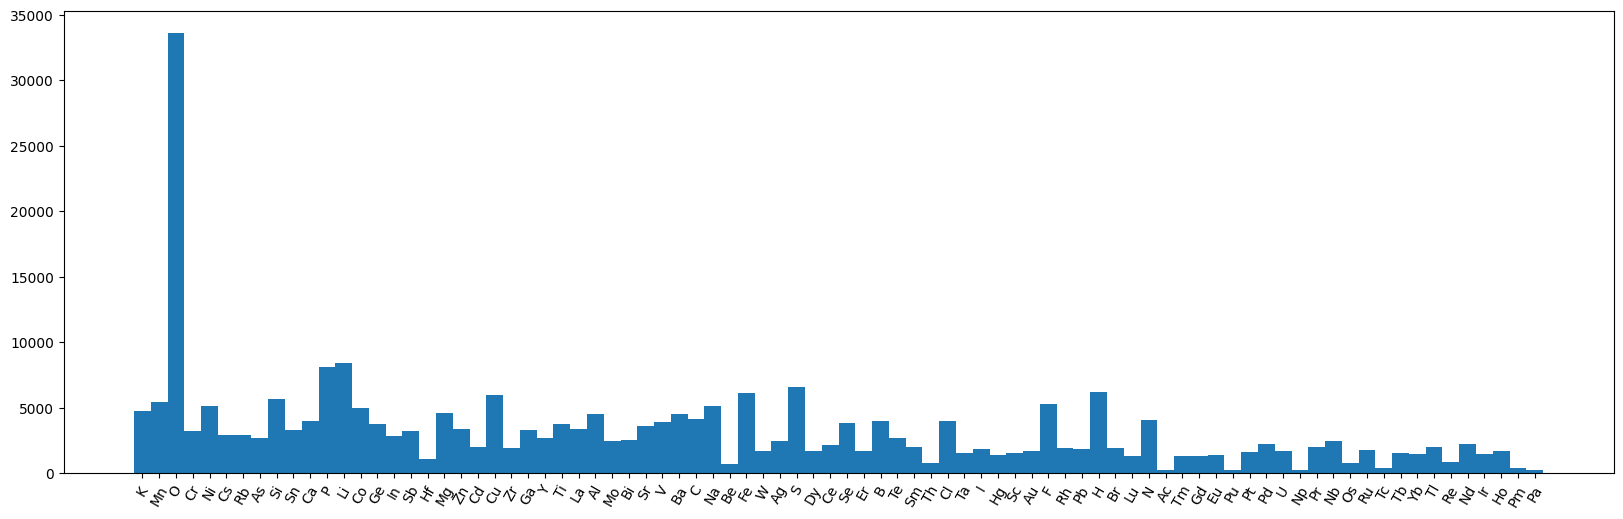

In [10]:
ElementDistribution(bg)

Ca:  418


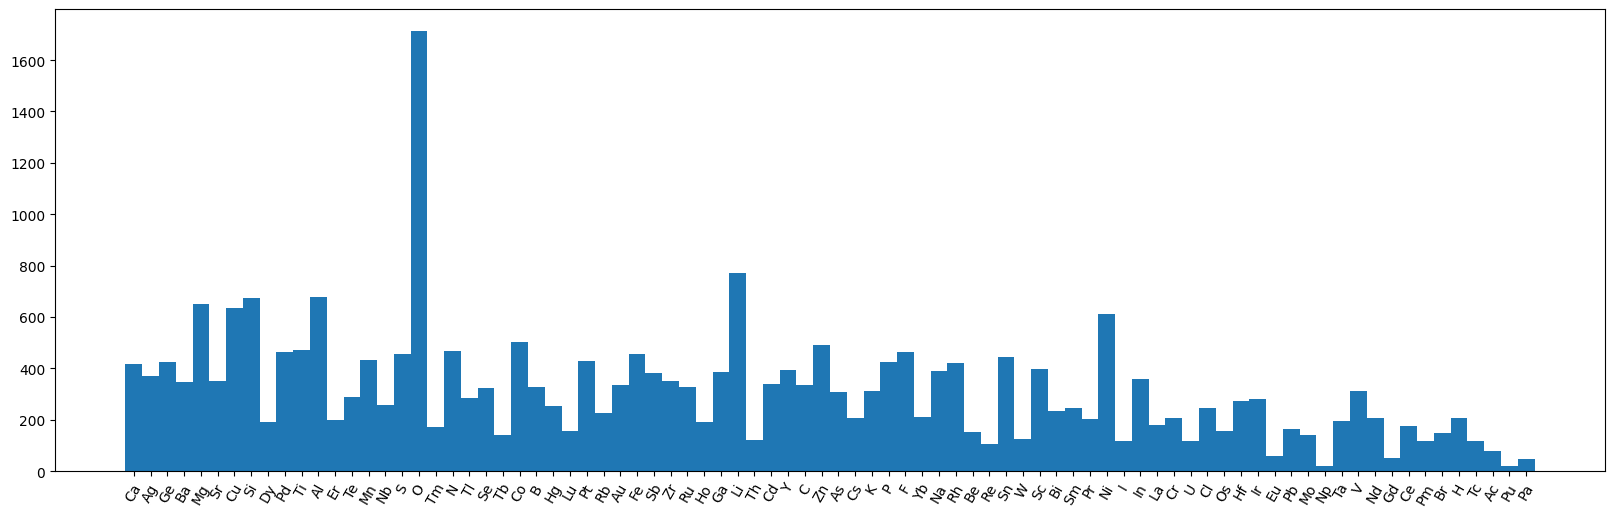

In [11]:
ElementDistribution(kvrh)

Ca:  3955


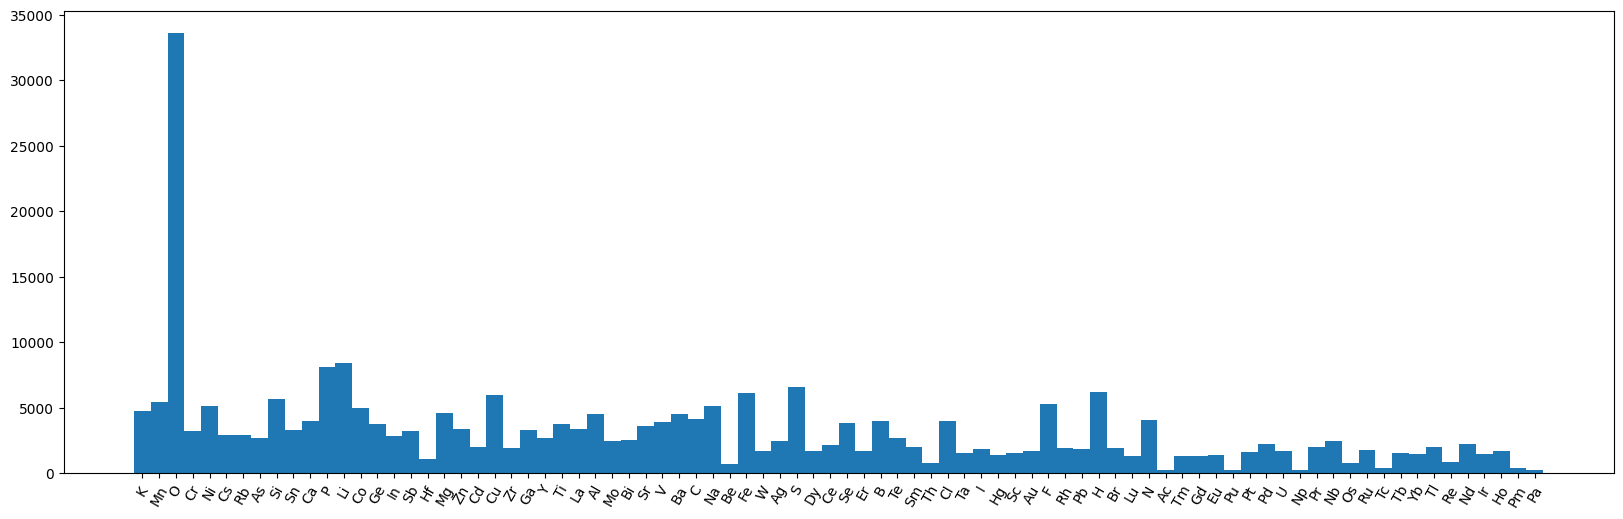

In [12]:
ElementDistribution(metal)

Ca:  364


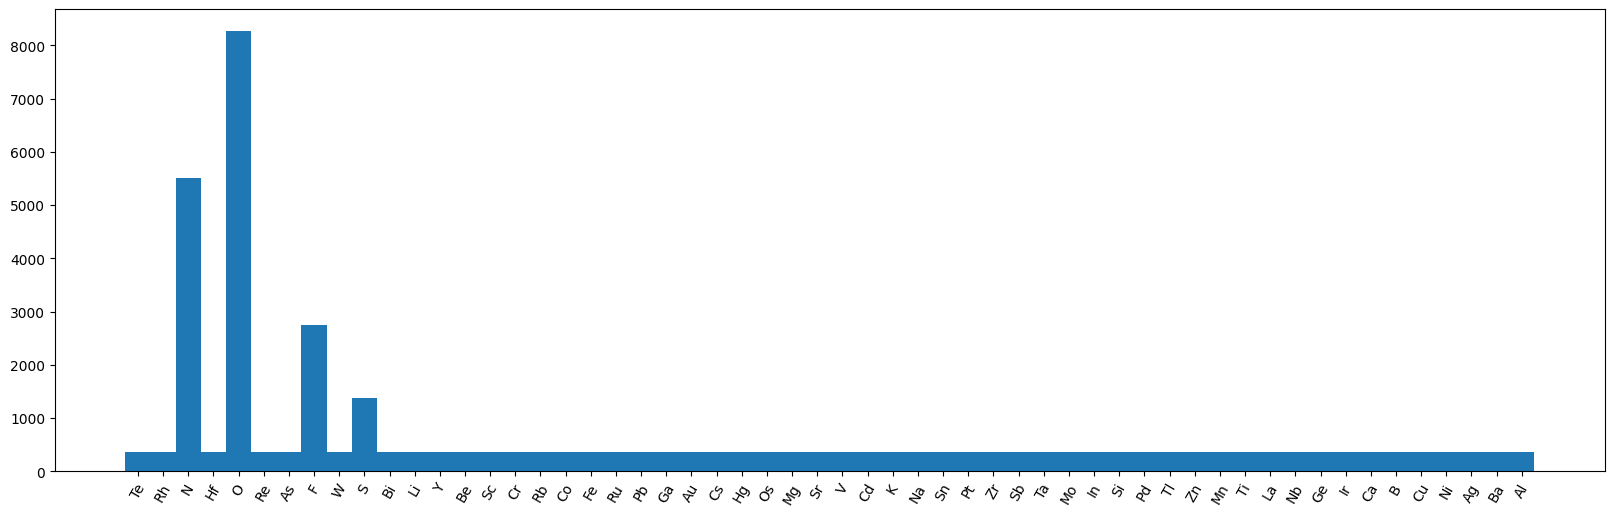

In [13]:
ElementDistribution(perov)

Ca:  62


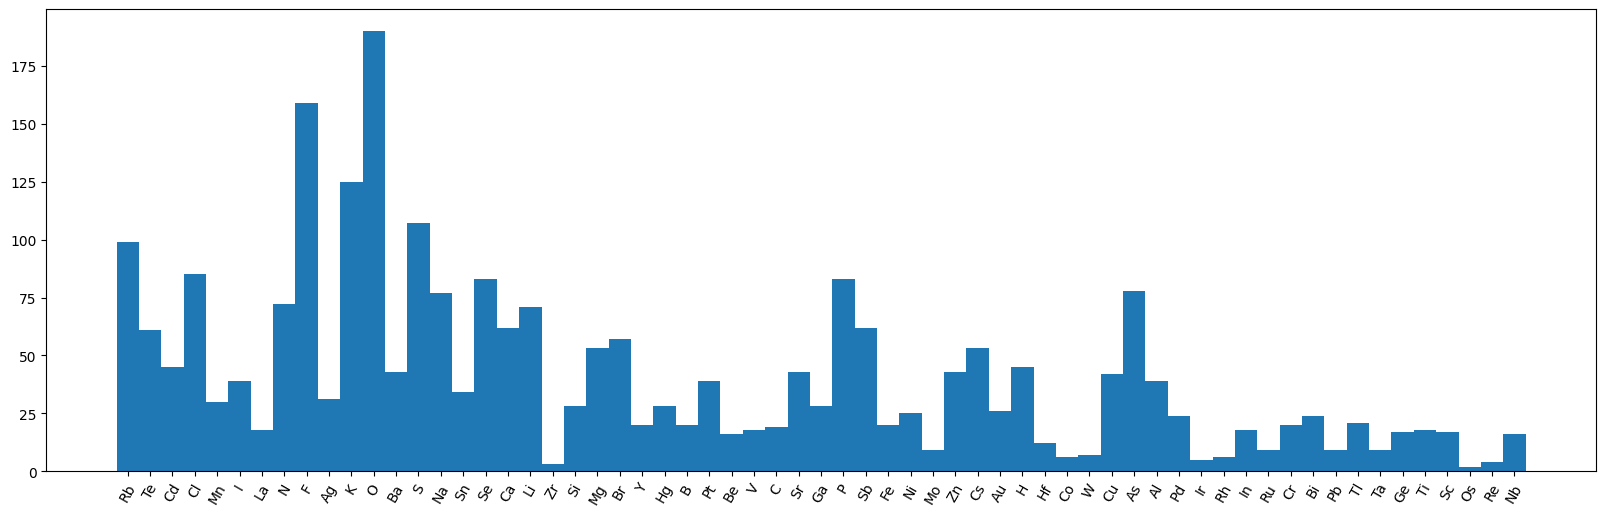

In [14]:
ElementDistribution(mat_dielect)

Ca:  69


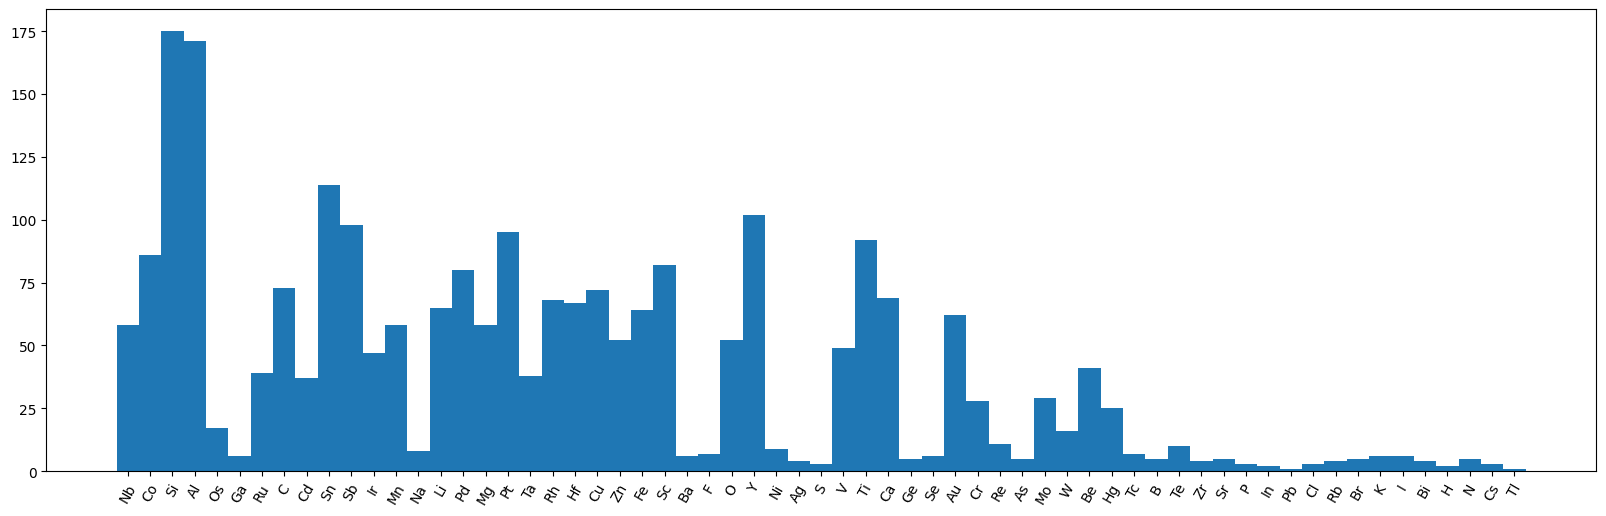

In [15]:
ElementDistribution(mat_elast)

In [21]:
def CaRemove(df, name):
    random.seed(10)
    
    ###
    ## training set without Ca compositions
    allCa_idx = []
    for i in range(len(df)):
        if "Ca" in Composition(df["composition"][i]):
            allCa_idx.append(i)
    noCa_df = df.drop(allCa_idx)
    
    if len(noCa_df) > 4500:
        idxx1 = random.sample(noCa_df.index.tolist(), 4500)
        noCa_df = noCa_df.loc[idxx1]
    
    ###
    ## training set with some Ca compositions
    someCa_idx = random.sample(allCa_idx, 10)   # add 10 to the training set
    someCa_df = pd.concat([noCa_df, df.loc[someCa_idx]])    
    
    
    allCa_df_ood = df.loc[allCa_idx]
    someCa_df_ood = allCa_df_ood.drop(someCa_idx)
        
    
    ###
    ## if ood samples are more than 200...    
    if len(allCa_idx) > 500:
        allCa_idx = random.sample(allCa_idx, 500)
        allCa_df_ood = allCa_df_ood.loc[allCa_idx]
        
    if len(someCa_df_ood) > 500:
        someCa_idx = random.sample(someCa_df_ood.index.tolist(), 500)
        someCa_df_ood = someCa_df_ood.loc[someCa_idx]
    
        
    print("Without Ca in the training set: ", len(noCa_df), len(allCa_df_ood))
    print("With 10 Ca in the training set: ", len(someCa_df), len(someCa_df_ood))
    
    ## Save files
    file_path = os.path.join("./ElementRemove/", name)
    if not os.path.exists(file_path):
        os.makedirs(file_path)
        
    noCa_df = noCa_df[["composition", "target"]].reset_index().rename(columns={'index':'material_id'})
    allCa_df_ood = allCa_df_ood[["composition", "target"]].reset_index().rename(columns={'index':'material_id'})
    
    noCa_df.to_csv(os.path.join("./ElementRemove/", name, f"{name}_withoutE.csv"), index=None)
    allCa_df_ood.to_csv(os.path.join("./ElementRemove/", name, f"{name}_withoutE_ood.csv"), index=None)
    
    
    someCa_df = someCa_df[["composition", "target"]].reset_index().rename(columns={'index':'material_id'})
    someCa_df_ood = someCa_df_ood[["composition", "target"]].reset_index().rename(columns={'index':'material_id'})
    someCa_df.to_csv(os.path.join("./ElementRemove/", name, f"{name}_withE.csv"), index=None)
    someCa_df_ood.to_csv(os.path.join("./ElementRemove/", name, f"{name}_withE_ood.csv"), index=None)


In [22]:
CaRemove(dielect, "dielect")

Without Ca in the training set:  3755 237
With 10 Ca in the training set:  3765 227


In [23]:
CaRemove(bg, "bg")

Without Ca in the training set:  4500 500
With 10 Ca in the training set:  4510 500


In [26]:
CaRemove(kvrh, "kvrh")

Without Ca in the training set:  4500 418
With 10 Ca in the training set:  4510 408


In [27]:
CaRemove(gvrh, "gvrh")

Without Ca in the training set:  4500 418
With 10 Ca in the training set:  4510 408


In [28]:
CaRemove(perov, "perov")

Without Ca in the training set:  4500 364
With 10 Ca in the training set:  4510 354


In [29]:
CaRemove(metal, "metal")

Without Ca in the training set:  4500 500
With 10 Ca in the training set:  4510 500


In [31]:
CaRemove(mat_dielect, "matminer_dielectric")

Without Ca in the training set:  902 62
With 10 Ca in the training set:  912 52


In [30]:
CaRemove(mat_elast, "matminer_elast")

Without Ca in the training set:  1018 69
With 10 Ca in the training set:  1028 59
